In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\risha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-23 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = "https://images.unsplash.com/photo-1509818564274-9d0f42fade2a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1974&q=80"

In [8]:
results=model(img)
results.print

<bound method Detections.print of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1481x1974 1 person, 1 bicycle, 1 car
Speed: 806.1ms pre-process, 69.2ms inference, 404.5ms NMS per image at shape (1, 3, 480, 640)>

<function matplotlib.pyplot.show(close=None, block=None)>

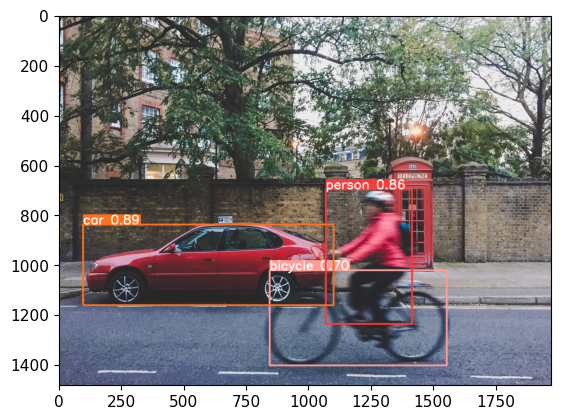

In [9]:
# to render image
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [11]:
##Training The Model ##


In [12]:
import uuid 
import os
import time

In [13]:
IMAGE_PATH= os.path.join('data','images')
labels = ['awake','drowsy']
num_imgs= 20

In [16]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting Images for {}'.format(label))
    time.sleep(5)
    
    #loop through image range
    
    for img_num in range(num_imgs):
        print('Collecting Images for {}, image number {}'.format(label, num_imgs))
    
        ret,frame = cap.read()
    
        imgname= os.path.join(IMAGE_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
!git clone https://github.com/HumanSignal/labelImg
    

Cloning into 'labelImg'...


In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/8e/e2/d296cb17bae19ba49137a2649934a70d5f48cc99b7daa6ce9cf1aecddfeb/PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     --------------------------------------- 0.0/50.1 MB 653.6 kB/s eta 0:01:17
     ---------------------------------------- 0.2/50.1 MB 1.7 MB/s eta 0:00:30
     ---------------------------------------- 0.5/50.1 MB 3.5 MB/s eta 0:00:15
      --------------------------------------- 0.9/50.1 MB 4.5 MB/s eta 0:00:11
      --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
'pyrcc5' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\risha\Driver': No such file or directory
YOLOv5  2023-10-23 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\risha\Driver': No such file or directory
YOLOv5  2023-10-23 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

**LOAD CUSTOM MODEL**

In [22]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\risha/.cache\torch\hub\master.zip
YOLOv5  2023-10-23 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [28]:
img = os.path.join('data','images', 'awake.41221ea5-7177-11ee-9b02-d88083cb6ad6.jpg')

In [29]:
results=model(img)

<function matplotlib.pyplot.show(close=None, block=None)>

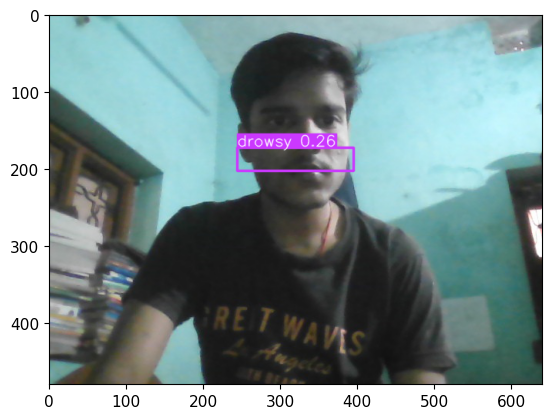

In [30]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()